In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, wilcoxon

In [41]:
df = pd.read_csv('Data/house_price_Dống-Da_Hà-Nội_subdata.csv')
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [42]:
df.dropna(subset=['area'], inplace=True)
df = df[(df['area'] > 0) | (df['price'] > 0)]

In [43]:
df['price/m2'] = df['price'] / df['area']

In [44]:
df.describe()

,area,price,postDate,toilet,bedroom,floor,lat,long,price/m2
count,639.000000,6.150000e+02,639.000000,240.000000,320.00000,366.000000,639.000000,639.000000,615.000000
mean,107.985524,2.897499e+04,44263.053208,3.645833,4.31875,4.762295,21.015620,105.825364,inf
std,480.906074,1.466833e+05,57.953151,2.349126,2.58976,1.676853,0.006592,0.009144,NaN
min,0.000000,4.500000e+00,44197.000000,1.000000,1.00000,1.000000,20.998499,105.795544,0.122500
25%,40.000000,3.925000e+03,44197.000000,2.000000,3.00000,4.000000,21.010448,105.822425,100.714286
50%,55.000000,8.900000e+03,44295.000000,4.000000,4.00000,5.000000,21.018072,105.828978,169.090909
75%,82.500000,2.165000e+04,44312.000000,4.250000,6.00000,5.000000,21.018997,105.829949,290.909091
max,11000.000000,3.300000e+06,44325.000000,16.000000,22.00000,11.000000,21.036845,105.841407,inf


## 1. Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ

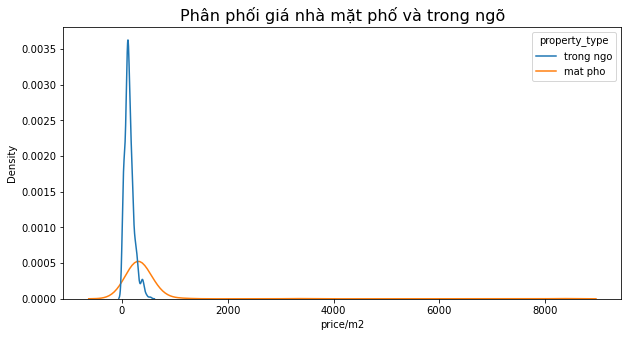

In [49]:
plt.rcParams['figure.figsize'] = (10,5)
sns.kdeplot(x = 'price/m2', hue = 'property_type', data = df)
plt.title('Phân phối giá nhà mặt phố và trong ngõ', fontsize = 16)
plt.show()

- Dữ liệu có phương sai khác nhau

## 2. Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%


### Phát biểu giả thuyết:
- H0 : $\mu_{mặt phố}$ = $\mu_{trong ngõ}$
- H1 : $\mu_{mặt phố}$ > $\mu_{trong ngõ}$

In [57]:
data1 = df.loc[df['property_type'] == 'trong ngo', 'price/m2']
data2 = df.loc[df['property_type'] == 'mat pho', 'price/m2']
statistic, pvalue = ttest_ind(data2.values,data1.values,equal_var = False,
                              alternative ='greater', nan_policy='omit')
print(f'statistic : {statistic}')
print(f'pvalue : {pvalue}')

statistic : 5.61717186315343
pvalue : 3.017325736116157e-08


### Kết luận : pvalue < $\alpha$
- Bác bỏ H0
- Vậy với độ tin cậy 95% thì có thể kết luận giá nhà mặt phố cao hơn gía nhà trong ngõ

## 3. Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý với mức ý nghĩa 5

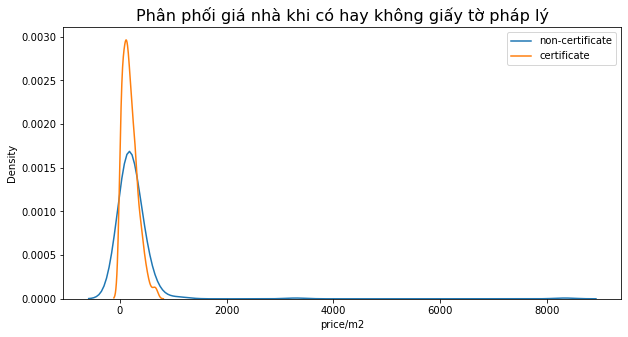

In [77]:
non_certi = df.loc[df['land_certificate'].isna(), 'price/m2']
certi = df.loc[df['land_certificate'].notna(), 'price/m2']
sns.kdeplot(data = non_certi, label = 'non-certificate')
sns.kdeplot(data = certi, label = 'certificate')
plt.legend()
plt.title('Phân phối giá nhà khi có hay không giấy tờ pháp lý', fontsize = 16)
plt.show()

### Phát biểu giả thuyết
- H0 : $\mu_{non-certificate}$ = $\mu_{certificate}$
- H1 : $\mu_{non-certificate}$ < $\mu_{certificate}$

In [83]:
statistic, pvalue = ttest_ind(non_certi.values,certi.values,equal_var = False,
                              alternative ='less', nan_policy='omit')
print(f'statistic : {statistic}')
print(f'pvalue : {pvalue}')

statistic : 1.7982063155076498
pvalue : 0.9633458952519227


### Kết luận : pvalue > $\alpha$
- Chưa đủ cơ sở bác bỏ H0
- Vậy với độ tin cậy 95% thì có thể kết luận giá nhà không có giấy tờ bằng giá nhà có giấy tờ pháp lý